# Suicide Rates for Countries 

## Setup and Imports

In [19]:
#Imports and csv readings 
import pandas as pd
import requests 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
data = pd.read_csv("master.csv")

In [39]:
#pairplot
#sns.pairplot(data)

## Load Data

In [37]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


## Cleaning Data and Displaying 

In [22]:
#cleaned up dataset
data_final = data[["country", "sex", "suicides_no", "population","year", "age", "suicides/100k pop", "gdp_per_capita ($)", "HDI for year"]]

In [23]:
#final dataset displayed 
data_final

,country,sex,suicides_no,population,year,age,suicides/100k pop,gdp_per_capita ($),HDI for year
0,Albania,male,21,312900,1987,15-24 years,6.71,796,NaN
1,Albania,male,16,308000,1987,35-54 years,5.19,796,NaN
2,Albania,female,14,289700,1987,15-24 years,4.83,796,NaN
3,Albania,male,1,21800,1987,75+ years,4.59,796,NaN
4,Albania,male,9,274300,1987,25-34 years,3.28,796,NaN
5,Albania,female,1,35600,1987,75+ years,2.81,796,NaN
6,Albania,female,6,278800,1987,35-54 years,2.15,796,NaN
7,Albania,female,4,257200,1987,25-34 years,1.56,796,NaN
8,Albania,male,1,137500,1987,55-74 years,0.73,796,NaN
9,Albania,female,0,311000,1987,5-14 years,0.00,796,NaN


 # Total suicides for Male and Female for 1985 to 2014

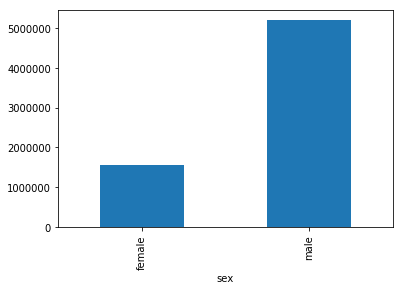

In [24]:
#display total number of suicides for male and female for 1985 to 2014 from every country
data_final.groupby('sex')['suicides_no'].sum().plot("bar")

# Top 5 Countries with most Suicides

In [25]:
#dispaly countries with the most suicides for 1985 to 2014
data_final.groupby("country")["suicides_no","country"].sum().sort_values("suicides_no", ascending=False).head()

,suicides_no
country,
Russian Federation,1209742
United States,1034013
Japan,806902
France,329127
Ukraine,319950


# Top 5 Countries with least Suicides

In [26]:
#display countries with least suicides 
data_final.groupby("country")["suicides_no","country"].sum().sort_values("suicides_no", ascending=True).head(10)

,suicides_no
country,
Dominica,0
Saint Kitts and Nevis,0
San Marino,4
Antigua and Barbuda,11
Maldives,20
Macau,27
Oman,33
Grenada,38
Cabo Verde,42


# Age Group with most Suicides

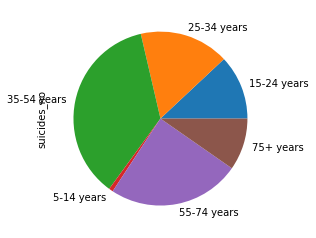

In [27]:
#number of suicides for age groups from 1985 to 2014
data_final.groupby('age')['suicides_no'].sum().plot("pie")

In [28]:
#data_nan = data_final.dropna(inplace = False)

In [41]:
#data_na = data_final["HDI for year"].mean()
#data_na

In [40]:
#data[["country"] "Dominica"]